# Punto 1

## 3.1 Ejemplo: red binaria no dirigida

In [1]:
# llamamos las librerias 
import networkx as nx
# definimos el grafo a trabajar 
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,3), (2,4), (3,5), (4,5), (4,6), (4,7), (5,6), (6,7)])

In [2]:
# imprimimos el tipo de dato y la direccion de memoria
print(type(G),'\n',id(G))

<class 'networkx.classes.graph.Graph'> 
 2470180143248


In [3]:
# mostrar nodos y la cantidad
print(G.nodes(),'\n',G.number_of_nodes())

[1, 2, 3, 4, 5, 6, 7] 
 7


In [4]:
# aristas y la cantidad
print(G.edges(),'\n',G.number_of_edges())

[(1, 2), (1, 3), (2, 3), (2, 4), (3, 5), (4, 5), (4, 6), (4, 7), (5, 6), (6, 7)] 
 10


In [5]:
import sys
sys.path.append('../src')
from utilidades import tallo_y_hoja
tallo_y_hoja(G)

1 -- [2, 3]
2 -- [1, 3, 4]
3 -- [1, 2, 5]
4 -- [2, 5, 6, 7]
5 -- [3, 4, 6]
6 -- [4, 5, 7]
7 -- [4, 6]


In [6]:
# es ponderada? 
print(nx.is_weighted(G))

False


In [7]:
# es simple?
print(G.is_multigraph()==False)

True


Text(0.5, 1.0, 'Red binaria no dirigida')

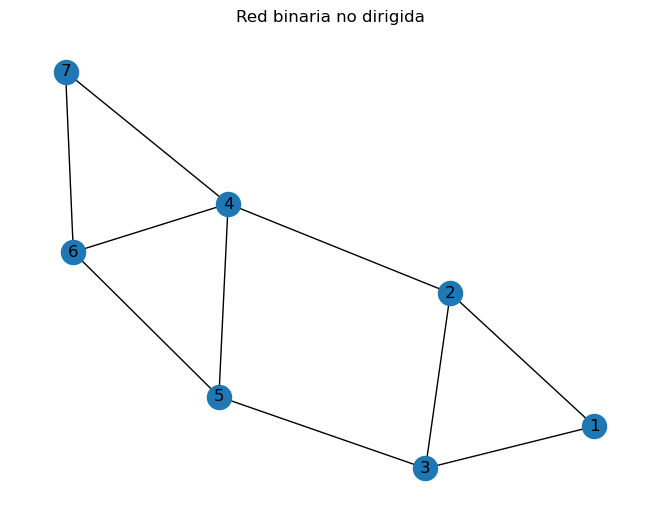

In [8]:
#visualizar el grafo con titulo
import random 
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True)
plt.title("Red binaria no dirigida")

## 3.2 Ejmplo: red ponderada no dirigida

In [9]:
# red ponderada no dirigida
WG = G.copy()
random.seed(0)
WG.add_weighted_edges_from([(u, v, round(random.uniform(0, 1), 3)) for u, v in WG.edges()]) 
# pesos 
nx.get_edge_attributes(WG, 'weight')

{(1, 2): 0.844,
 (1, 3): 0.758,
 (2, 3): 0.421,
 (2, 4): 0.259,
 (3, 5): 0.511,
 (4, 5): 0.405,
 (4, 6): 0.784,
 (4, 7): 0.303,
 (5, 6): 0.477,
 (6, 7): 0.583}

In [10]:
# ponderada?
print(nx.is_weighted(WG))

True


Text(0.5, 1.0, 'Red Ponderada no dirigida')

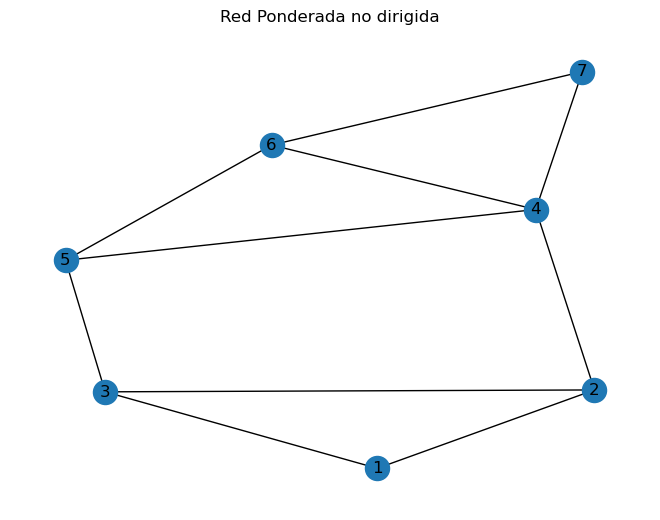

In [11]:
nx.draw(WG, with_labels=True)
plt.title("Red Ponderada no dirigida")

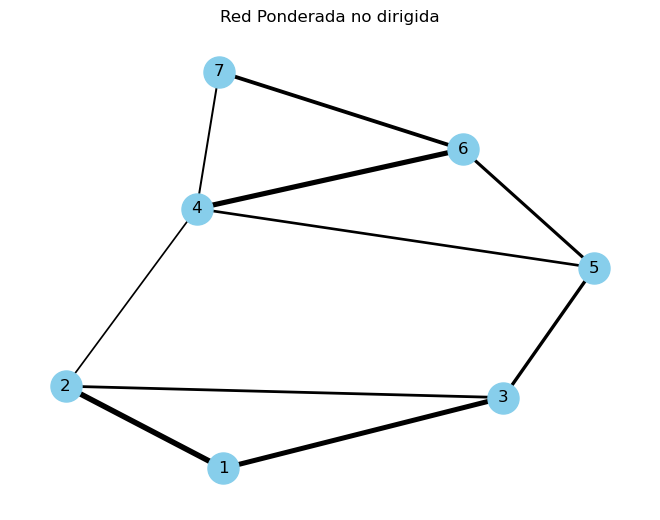

In [12]:
from utilidades import grafico_ponderado

grafico_ponderado(WG,n=4,label='Red Ponderada no dirigida')

## 3.3 Ejemplo: red binaria dirigida

In [13]:
# red binaria dirigida
DG = nx.DiGraph()
DG.add_edges_from([(1,2), (1,3), (2,3)])

In [14]:
# aristas 
print(DG.edges())

[(1, 2), (1, 3), (2, 3)]


In [15]:
# etiquetas
name = ['Juan','Maria','Pedro']
nx.set_node_attributes(DG, dict(enumerate(name, start=1)), 'name')

sexo = ['M','F','M']
nx.set_node_attributes(DG, dict(enumerate(sexo, start=1)), 'sexo')

print([(DG.nodes[u]['name'], DG.nodes[v]['name']) for u, v in DG.edges()])

[('Juan', 'Maria'), ('Juan', 'Pedro'), ('Maria', 'Pedro')]


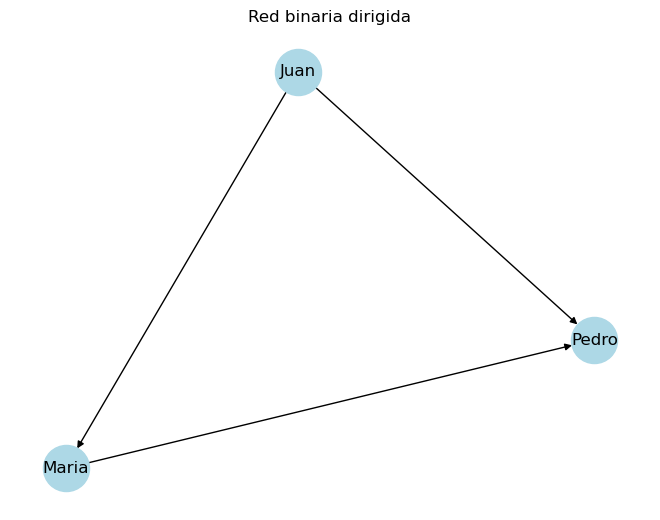

In [16]:
labels = nx.get_node_attributes(DG, 'name')
nx.draw(DG, labels=labels, with_labels=True, node_size=1100, node_color='lightblue')
plt.title("Red binaria dirigida")
plt.show()

## 4.2 Ejemplo: red binaria no dirigida

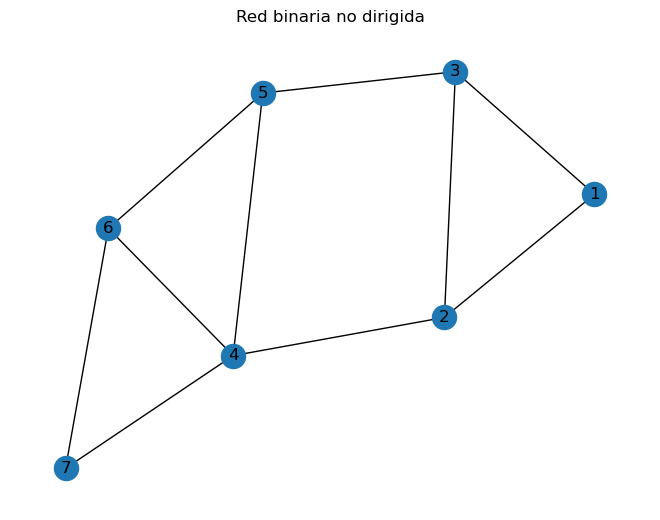

In [17]:
# definimos el grafo    
G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,3), (2,4), (3,5), (4,5), (4,6), (4,7), (5,6), (6,7)])
nx.draw(G, with_labels=True)
plt.title("Red binaria no dirigida")
plt.show()

In [18]:
# matriz de adyacencia
A = nx.adjacency_matrix(G)
# tipo de objeto
type(A)

scipy.sparse._csr.csr_array

In [19]:
# imprimir la matriz
print(A)

  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (2, 4)	1
  (3, 1)	1
  (3, 4)	1
  (3, 5)	1
  (3, 6)	1
  (4, 2)	1
  (4, 3)	1
  (4, 5)	1
  (5, 3)	1
  (5, 4)	1
  (5, 6)	1
  (6, 3)	1
  (6, 5)	1


In [26]:
# formato de matriz
Y = A.todense()
print(Y)
type(Y)

[[0 1 1 0 0 0 0]
 [1 0 1 1 0 0 0]
 [1 1 0 0 1 0 0]
 [0 1 0 0 1 1 1]
 [0 0 1 1 0 1 0]
 [0 0 0 1 1 0 1]
 [0 0 0 1 0 1 0]]


numpy.ndarray

In [27]:
# es simertrica?
import numpy as np
np.array_equal(Y, Y.T)

True

In [28]:
# 
yvec1 = [Y[i, j] for i in range(Y.shape[0]) for j in range(Y.shape[1]) if i > j]
yvec1

[1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1]

In [29]:
yvec2 = np.where(np.array(yvec1) == 1)[0]
yvec2

array([ 0,  1,  2,  4,  8,  9, 13, 14, 18, 20], dtype=int64)

In [30]:
import numpy as np

# Matriz de aristas
n = Y.shape[0]
edges = []
for i in range(n - 1):
    for j in range(i + 1, n):
        if Y[i, j] == 1:
            edges.append((i + 1, j + 1))  # Sumamos 1 para ajustar a la numeración de nodos en NetworkX

# Convertir a matriz
A = np.array(edges)

# Clase de objeto
print(type(A))

# Imprimir matriz de aristas
print(A)

<class 'numpy.ndarray'>
[[1 2]
 [1 3]
 [2 3]
 [2 4]
 [3 5]
 [4 5]
 [4 6]
 [4 7]
 [5 6]
 [6 7]]


# Punto 2 